<a href="https://colab.research.google.com/github/brunoaiolfi/EMNIST-MODEL/blob/main/EMNIST_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
##Importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from joblib import dump  # Biblioteca para salvar em .joblib
import pickle  # Biblioteca para salvar em .pkl

In [35]:
# Carregando o dataset EMNIST 'Balanced', que inclui dígitos e letras
emnist = fetch_openml('emnist_balanced', version=1)
X, y = emnist.data, emnist.target

In [36]:
# Convertendo os labels para inteiros
y = y.astype(int)

In [37]:
# Dividindo o conjunto em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

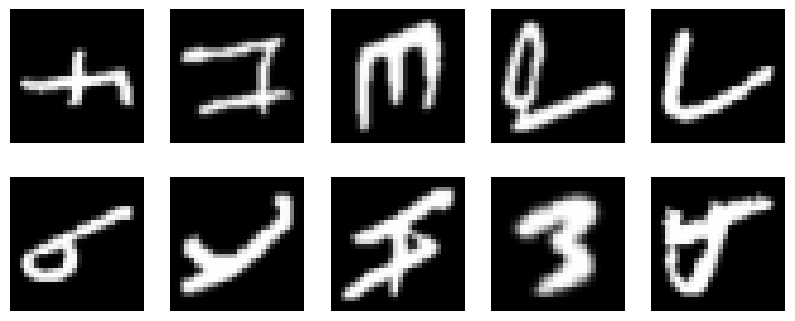

In [38]:
# Visualizando algumas amostras do dataset
plt.figure(figsize=(10, 4))
for i in range(1, 11):
    plt.subplot(2, 5, i)
    plt.imshow(X_train.iloc[i].values.reshape(28, 28), cmap="gray")
    plt.axis('off')
plt.show()

In [15]:
# Feature Selection & Feature Engineering com PCA
# Reduzindo a dimensionalidade com PCA para acelerar o processo de treinamento
pca = PCA(n_components=50)  # 50 componentes principais
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [16]:
# Usando uma amostra menor do conjunto de treino para otimizar os hiperparâmetros
X_train_sample, _, y_train_sample, _ = train_test_split(X_train_pca, y_train, test_size=0.9, random_state=42)

In [17]:
# Configurando o modelo de SVM e os parâmetros para RandomizedSearch
svm = SVC()

# Reduzindo o grid de parâmetros
param_grid = {
    'C': [0.1, 1],            # Menos valores para regularização
    'kernel': ['rbf'],         # Usando apenas o kernel RBF
    'gamma': ['scale', 0.001]  # Menos opções para gamma
}

In [18]:
# Utilizando o RandomizedSearchCV para encontrar os melhores hiperparâmetros
random_search = RandomizedSearchCV(svm, param_grid, n_iter=4, cv=3, verbose=2, n_jobs=-1, random_state=42)
random_search.fit(X_train_sample, y_train_sample)

# Verificando os melhores parâmetros encontrados
print("Melhores parâmetros:", random_search.best_params_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Melhores parâmetros: {'kernel': 'rbf', 'gamma': 'scale', 'C': 1}


In [19]:
# Treinando o modelo final com os melhores parâmetros encontrados
best_svm = random_search.best_estimator_
best_svm.fit(X_train_pca, y_train)

SVC(C=1)

In [20]:
# Realizando previsões no conjunto de teste
y_pred = best_svm.predict(X_test_pca)

In [21]:
# Avaliando o modelo
print("Acurácia no conjunto de teste:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Acurácia no conjunto de teste: 0.8516337386018237
              precision    recall  f1-score   support

           0       0.60      0.73      0.66       535
           1       0.52      0.77      0.62       547
           2       0.87      0.81      0.84       576
           3       0.95      0.94      0.95       560
           4       0.87      0.89      0.88       534
           5       0.89      0.87      0.88       563
           6       0.92      0.91      0.91       586
           7       0.93      0.97      0.95       518
           8       0.85      0.89      0.87       552
           9       0.66      0.87      0.75       561
          10       0.89      0.95      0.92       549
          11       0.90      0.91      0.90       565
          12       0.94      0.92      0.93       565
          13       0.89      0.89      0.89       556
          14       0.95      0.93      0.94       540
          15       0.65      0.53      0.58       529
          16       0.91      0.

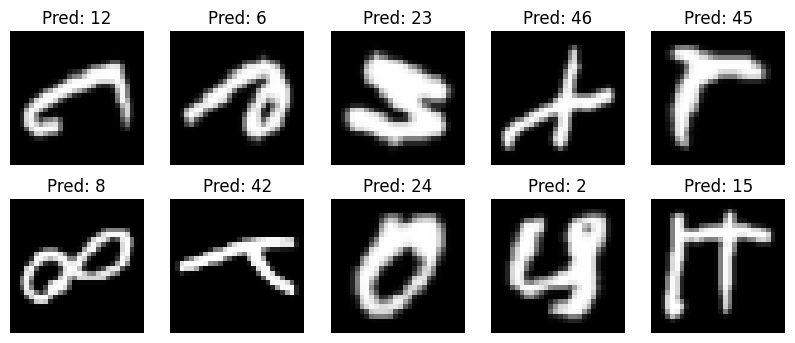

In [33]:
# Visualizando algumas previsões
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test.iloc[i].values.reshape(28, 28), cmap="gray")
    plt.title(f'Pred: {y_pred[i]}')
    plt.axis('off')
plt.show()

In [22]:
# Salvando o modelo treinado
dump(best_svm, 'svc_model.joblib')  # Salva o modelo em um arquivo
print("Modelo SVC salvo como 'svc_model.joblib'!")

Modelo SVC salvo como 'svc_model.joblib'!


In [23]:
# Salvando o modelo em formato .pkl (pickle)
with open('svc_model.pkl', 'wb') as f:
    pickle.dump(best_svm, f)
print("Modelo SVC salvo como 'svc_model.pkl'!")

Modelo SVC salvo como 'svc_model.pkl'!
